In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('C:/Users/DSSAL/Downloads/RF_mobilehealth/revision_data/traindata_2015_2018_beforeCovid.csv')

In [3]:
train_data = train_data.dropna()

In [4]:
train_data

,contents,star,agree,date,sentiment,year,clean_review
0,Just started using this app so I'm still figur...,5,0,2017-06-22 05:29:21,1,2017,start us thi ap i'm stil fig lov far
1,I switched to new phone after upgrade and now ...,1,0,2016-07-20 03:18:54,0,2016,switch new phon aft upgrad stepcount long work
2,It tracks the steps and the heart beat in an e...,4,0,2015-04-25 05:42:00,1,2015,track step heart beat excel way stil nee som i...
3,It keeps record of everything nice app must tr...,5,0,2018-11-17 13:35:45,1,2018,keep record everyth nic ap must try ont
4,i have a gear and want use .. after install i ...,1,1,2016-03-08 18:11:42,0,2016,hav gear want us aft instal op popup com show ...
...,...,...,...,...,...,...,...
31307,I used to be able to manually add exercise tha...,2,0,2016-08-02 10:19:33,0,2016,us abl man ad exerc record phon swim zumb feat...
31308,Too invasive,1,0,2016-07-20 06:51:36,0,2016,invas
31309,Like it,5,0,2016-11-29 08:13:47,1,2016,lik
31310,It's oky,4,0,2017-03-24 14:47:16,1,2017,oky


In [5]:
reviews = list(train_data['clean_review'])
sentiments = list(train_data['sentiment'])

In [6]:
vectorizer = CountVectorizer(analyzer = "word", max_features = 5000) 

x_train = vectorizer.fit_transform(reviews)
y_train = np.array(sentiments)

In [7]:
x_train

<31312x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 327373 stored elements in Compressed Sparse Row format>

In [8]:
# from sklearn.ensemble import RandomForestClassifier


# # 랜덤 포레스트 분류기에  100개 의사 결정 트리를 사용한다.
# forest = RandomForestClassifier(max_depth= 10, n_estimators = 200, min_samples_leaf=1, min_samples_split=2) 

# # 단어 묶음을 벡터화한 데이터와 정답 데이터를 가지고 학습을 시작한다.
# forest.fit(x_train, y_train)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_list = {'max_depth': [10, 20, 30, 40, 50],
'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

rf_model = RandomForestClassifier(random_state = 82)

forest = GridSearchCV(
        estimator=rf_model,
        param_grid = param_list,
        cv = 5,
        n_jobs = -1,
        scoring = 'accuracy',
        verbose = 2)

forest.fit(x_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=82), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             scoring='accuracy', verbose=2)

In [10]:
print("Accuracy: %f" %  forest.score(x_train, y_train))

Accuracy: 0.936350


In [11]:
#검증데이터셋 성능 평가
test_data = pd.read_csv('C:/Users/DSSAL/Downloads/RF_mobilehealth/revision_data/testdata_2019_beforeCovid.csv')
test_data = test_data.dropna()

test_reviews = list(test_data['clean_review'])

In [12]:
test_data_features = vectorizer.transform(test_reviews)
test_input = test_data_features

realAnswer = list(test_data['sentiment'])
test_label = np.array(realAnswer)

In [13]:
rf_pred = forest.predict(test_input)

In [14]:
print("Accuracy: %f" % accuracy_score(test_label, rf_pred))

Accuracy: 0.861768


Text(0.5, 257.44, 'Predicted label')

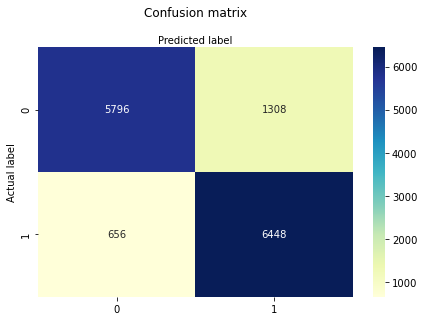

In [15]:
cnf_matrix = metrics.confusion_matrix(test_label, rf_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
print("Accuracy:",metrics.accuracy_score(test_label, rf_pred))
print("Precision:",metrics.precision_score(test_label, rf_pred))
print("Recall:",metrics.recall_score(test_label, rf_pred))

Accuracy: 0.8617680180180181
Precision: 0.8313563692625064
Recall: 0.9076576576576577


In [17]:
import joblib 

# 모델 저장
joblib.dump(forest, 'C:/Users/DSSAL/Downloads/RF_mobilehealth/rf_bow_with_gridsearch_beforeCovid.pkl')

# 모델 불러오기
rf_model = joblib.load('C:/Users/DSSAL/Downloads/RF_mobilehealth/rf_bow_with_gridsearch_beforeCovid.pkl')

In [18]:
rf_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=82), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             scoring='accuracy', verbose=2)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rf_model.predict(test_input)
predictions = [value for value in y_pred]

accuracy_score(test_label, predictions)

0.8617680180180181

In [20]:
from sklearn.metrics import classification_report

report = classification_report(test_label, y_pred, target_names=['class low', 'class high'], output_dict=True)
df = pd.DataFrame(report).transpose()

df

,precision,recall,f1-score,support
class low,0.898326,0.815878,0.855120,7104.000000
class high,0.831356,0.907658,0.867833,7104.000000
accuracy,0.861768,0.861768,0.861768,0.861768
macro avg,0.864841,0.861768,0.861476,14208.000000
weighted avg,0.864841,0.861768,0.861476,14208.000000


In [21]:
forest.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}